In [ ]:
!pip install pydotplus

In [ ]:
!pip install plotnine

In [90]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence



In [5]:
df = pd.read_csv('./dt_encoded.csv')

In [23]:
df.columns

Index(['journey_month', 'journey_day', 'dep_hour', 'dep_min', 'Arrival_hour',
       'Arrival_min', 'Arrived_next_day', 'Duration_in_mins', 'price',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'destination_Banglore', 'destination_Cochin',
       'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata',
       'source_Banglore', 'source_Chennai', 'source_Delhi', 'source_Kolkata',
       'source_Mumbai', '1 stop', '2 stops', '3 stops', '4 stops', 'non-stop',
       'departure_After noon', 'departure_early morning', 'departure_evening',
       'departure_late night', 'departure_morning', 'departure_night',
       'arrival_After noon', 'arrival_early morning', 'arrival_evening',
       'arrival_late night', 'arrival_morning', 'arrival_night', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'F

In [8]:
# create train/test split
train, test = train_test_split(df, train_size=0.7, random_state = 123)
# separate features and target
X_train = train.drop("price", axis = 1)
y_train = train[["price"]]

### Create Decision tree based on:
1- Departure
2- Destination 
3- airline

In [84]:

#create model object 
dt_mod = DecisionTreeRegressor(max_depth=5)
loss = 'neg_root_mean_squared_error'
dt_target_names = 'price'
dt_feature_names = ['destination_Banglore',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata','source_Banglore', 'source_Chennai',
       'source_Delhi', 'source_Kolkata', 'source_Mumbai', 'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy']


#fit/train model using 
dt_fit = dt_mod.fit(X_train[[str(s) for s in dt_feature_names]], y_train)



In [85]:
dt_fit.get_n_leaves()

11

[Text(219.7125, 199.32, 'X[14] <= 0.5\nmse = 22441092.045\nsamples = 7323\nvalue = 9039.892'),
 Text(146.475, 163.07999999999998, 'X[15] <= 0.5\nmse = 18339289.557\nsamples = 4738\nvalue = 7603.818'),
 Text(104.625, 126.83999999999999, 'X[16] <= 0.5\nmse = 14948088.313\nsamples = 4732\nvalue = 7539.461'),
 Text(83.7, 90.6, 'X[11] <= 0.5\nmse = 12324601.003\nsamples = 3897\nvalue = 6825.611'),
 Text(41.85, 54.359999999999985, 'X[7] <= 0.5\nmse = 6226624.312\nsamples = 2724\nvalue = 5652.526'),
 Text(20.925, 18.119999999999976, 'mse = 5549378.656\nsamples = 2025\nvalue = 5150.002'),
 Text(62.775000000000006, 18.119999999999976, 'mse = 5337643.444\nsamples = 699\nvalue = 7108.335'),
 Text(125.55000000000001, 54.359999999999985, 'X[9] <= 0.5\nmse = 15868654.94\nsamples = 1173\nvalue = 9549.81'),
 Text(104.625, 18.119999999999976, 'mse = 13763430.918\nsamples = 1078\nvalue = 9819.731'),
 Text(146.475, 18.119999999999976, 'mse = 29549347.53\nsamples = 95\nvalue = 6486.916'),
 Text(125.550000

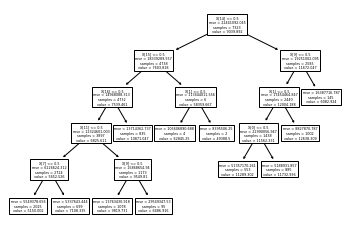

In [86]:
plot_tree(dt_fit)

In [71]:
kfold = KFold(n_splits = 5, random_state = 123, shuffle = True)
results = cross_val_score(dt_mod, X_train[[str(s) for s in dt_feature_names]], y_train, cv=kfold, scoring = loss)
np.round(np.abs(results))

array([3370., 3129., 3346., 3497., 3572.])

In [81]:
#create grid of hyperparameter values 
hyper_grid = {
    'ccp_alpha': [1e-1, 1e-5, 1e-10],
    'max_depth': [14, 15, 16],
    'min_samples_split': [120, 125, 150]
}

In [82]:
grid_search = GridSearchCV(dt_mod, hyper_grid, cv = kfold, scoring = loss)
results = grid_search.fit(X_train[[str(s) for s in dt_feature_names]], y_train)
results.best_estimator_


DecisionTreeRegressor(ccp_alpha=1e-05, max_depth=14, min_samples_split=120)

In [83]:
round(abs(results.best_score_), 2)

3387.13

ValueError: x and y must be the same size

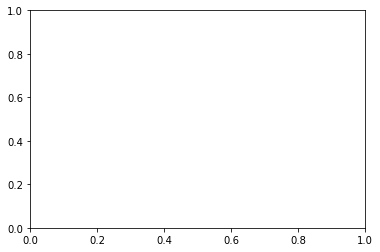

In [47]:
#plot the results 
plt.figure() 
plt.scatter(X_train, y_train, s=20, label="data")
plt.ylabel("target (Price)")
plt.xlabel("data")


In [ ]:
# tree.export_graphviz(dt_fit, out_file='tree.dot', 
#     feature_names=dt_feature_names, class_names=dt_target_names,
#     filled=True)  
# graph = pydotplus.graph_from_dot_file('tree.dot')
# Image(graph.create_png())

## Full DT Model 

In [94]:

#create model object 
dt_mod = DecisionTreeRegressor(max_depth=5)
loss = 'neg_root_mean_squared_error'
dt_target_names = 'price'
dt_feature_names = X_train[X_train.columns]


#fit/train model using 
dt_fit = dt_mod.fit(X_train[[str(s) for s in dt_feature_names]], y_train)



In [95]:
dt_fit.get_n_leaves()

25

[Text(142.9875, 199.32, 'X[7] <= 297.5\nmse = 22441092.045\nsamples = 7323\nvalue = 9039.892'),
 Text(62.775000000000006, 163.07999999999998, 'X[13] <= 0.5\nmse = 5781978.084\nsamples = 2606\nvalue = 5122.335'),
 Text(55.800000000000004, 126.83999999999999, 'X[1] <= 3.5\nmse = 4742291.169\nsamples = 2605\nvalue = 5102.339'),
 Text(27.900000000000002, 90.6, 'X[50] <= 0.5\nmse = 13176229.113\nsamples = 266\nvalue = 7776.699'),
 Text(13.950000000000001, 54.359999999999985, 'X[34] <= 0.5\nmse = 6397654.995\nsamples = 218\nvalue = 6907.119'),
 Text(6.9750000000000005, 18.119999999999976, 'mse = 18749284.726\nsamples = 19\nvalue = 10115.105'),
 Text(20.925, 18.119999999999976, 'mse = 4141965.609\nsamples = 199\nvalue = 6600.829'),
 Text(41.85, 54.359999999999985, 'X[28] <= 0.5\nmse = 24930678.582\nsamples = 48\nvalue = 11726.042'),
 Text(34.875, 18.119999999999976, 'mse = 20275419.22\nsamples = 39\nvalue = 13112.897'),
 Text(48.825, 18.119999999999976, 'mse = 652276.222\nsamples = 9\nvalue =

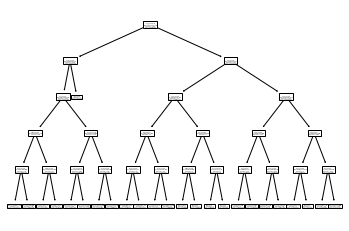

In [99]:
tree.plot_tree(dt_fit)

In [100]:
kfold = KFold(n_splits = 5, random_state = 123, shuffle = True)
results = cross_val_score(dt_mod, X_train[[str(s) for s in dt_feature_names]], y_train, cv=kfold, scoring = loss)
np.round(np.abs(results))

array([2911., 2266., 2555., 2556., 2958.])

In [122]:
#create grid of hyperparameter values 
hyper_grid = {
    'ccp_alpha': [1e-1, 1e-5, 1e-10],
    'max_depth': [11, 13, 15],
    'min_samples_split': [32, 35, 37]
}

In [123]:
grid_search = GridSearchCV(dt_mod, hyper_grid, cv = kfold, scoring = loss)
results = grid_search.fit(X_train[[str(s) for s in dt_feature_names]], y_train)
results.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.1, max_depth=15, min_samples_split=35)

In [124]:
round(abs(results.best_score_), 2)

2249.25

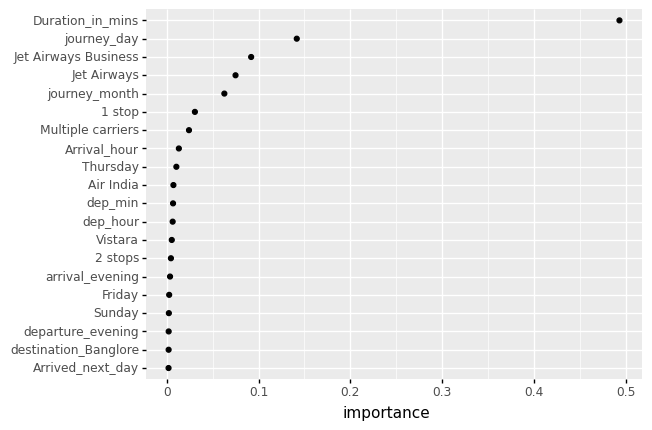

<ggplot: (8730520311513)>

In [91]:
#create final model object 
best_mod = results.best_estimator_
best_mod_fit = best_mod.fit(X_train, y_train)
# extract feature importances
vi = pd.DataFrame({'feature': X_train.columns,
                   'importance': best_mod_fit.feature_importances_})

# get top 20 influential features
top_20_features = vi.nlargest(20, 'importance')

# plot feature importance
(ggplot(top_20_features, aes(x='importance', y='reorder(feature, importance)'))
 + geom_point()
 + labs(y=None))

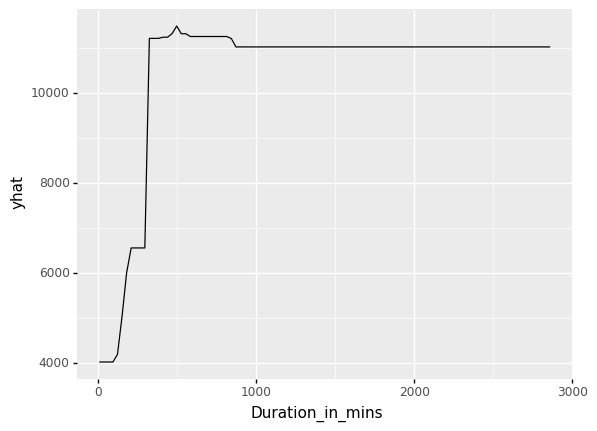

<ggplot: (8730518078067)>

In [92]:
pd_results = partial_dependence(
  best_mod_fit, X_train, 'Duration_in_mins', kind='average',
  percentiles=(0, 1)) 
  
pd_output = pd.DataFrame({'Duration_in_mins': pd_results['values'][0],
                          'yhat': pd_results['average'][0]})
                          
(ggplot(pd_output, aes('Duration_in_mins', 'yhat'))
  + geom_line())